## CNN
> https://docs.google.com/presentation/d/1-umWeAgZYBETWoo-9JZBjNp4sWFRgk88xdOYZUxLzaM/edit#slide=id.g5c3a270bdb_0_57

In [1]:
from keras.datasets import cifar10
import keras
import os 
# 隱藏warning
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 參數設定
batch_size = 32
num_classes = 10
epochs = 25
# data_augmentation = True
num_predictions = 20

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 訓練跟測試資料的筆數
print(x_train.shape, x_test.shape)
print(y_train[0])

(50000, 32, 32, 3) (10000, 32, 32, 3)
[6]


In [2]:
# normalize
x_train = x_train/255
x_test = x_test/255

### model
沒做BatchNormalization()的準確度大概78趴

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

W0701 19:59:25.601516 14908 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 19:59:25.612481 14908 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 19:59:25.613484 14908 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 19:59:25.628503 14908 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session i

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
__________

In [4]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history_deep = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True, verbose=2)

W0701 19:59:26.840641 14908 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0701 19:59:26.897675 14908 deprecation.py:323] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 15s - loss: 1.5586 - acc: 0.4532 - val_loss: 1.4931 - val_acc: 0.5140
Epoch 2/25
 - 13s - loss: 1.0854 - acc: 0.6204 - val_loss: 1.2179 - val_acc: 0.5960
Epoch 3/25
 - 12s - loss: 0.9138 - acc: 0.6813 - val_loss: 0.8675 - val_acc: 0.6965
Epoch 4/25
 - 12s - loss: 0.8173 - acc: 0.7151 - val_loss: 0.7180 - val_acc: 0.7496
Epoch 5/25
 - 12s - loss: 0.7365 - acc: 0.7431 - val_loss: 0.6711 - val_acc: 0.7634
Epoch 6/25
 - 12s - loss: 0.6814 - acc: 0.7628 - val_loss: 0.6577 - val_acc: 0.7730
Epoch 7/25
 - 12s - loss: 0.6329 - acc: 0.7816 - val_loss: 0.6485 - val_acc: 0.7760
Epoch 8/25
 - 12s - loss: 0.5846 - acc: 0.7964 - val_loss: 0.6290 - val_acc: 0.7850
Epoch 9/25
 - 12s - loss: 0.5487 - acc: 0.8079 - val_loss: 0.6290 - val_acc: 0.7818
Epoch 10/25
 - 11s - loss: 0.5062 - acc: 0.8190 - val_loss: 0.6491 - val_acc: 0.7816
Epoch 11/25
 - 10s - loss: 0.4789 - acc: 0.8326 - val_loss: 0.5963 - val_acc: 0.7938
Epoch 12/25
 - 11s - los

In [5]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 76us/step


[0.6155397005081177, 0.8191]

In [6]:
# 解釋evaluate()的回傳
model.metrics_names

['loss', 'acc']

In [7]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer", 5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [8]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction, idx,num=10):
    # idx是起始值
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(idx)+','+label_dict[labels[idx][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

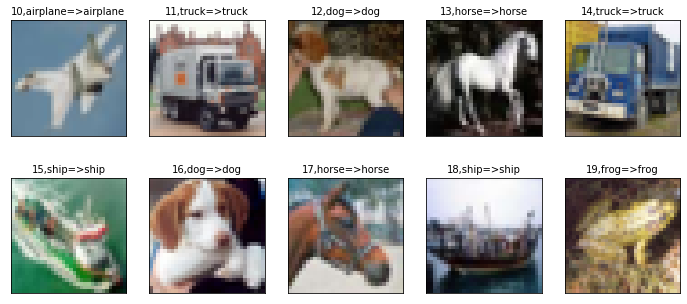

In [9]:
prediction=model.predict_classes(x_test)
plot_images_labels_prediction(x_test,y_test, prediction,10,10)

#### shallow

In [48]:
model_shallow = Sequential()
model_shallow.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_shallow.add(Activation('relu'))
model_shallow.add(BatchNormalization())
model_shallow.add(MaxPooling2D(pool_size=(4, 4)))
model_shallow.add(Dropout(0.5))

model_shallow.add(Flatten())
model_shallow.add(Dense(300))
model_shallow.add(Activation('relu'))
model_shallow.add(Dropout(0.5))
model_shallow.add(Dense(num_classes))
model_shallow.add(Activation('softmax'))

model_shallow.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_50 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 300)               1229100   
__________

In [49]:
model_shallow.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history_shallow = model_shallow.fit(x_train, y_train,batch_size=batch_size,epochs=25,validation_data=(x_test, y_test),shuffle=True, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 9s - loss: 1.6685 - acc: 0.4069 - val_loss: 1.3218 - val_acc: 0.5292
Epoch 2/25
 - 9s - loss: 1.4039 - acc: 0.5038 - val_loss: 1.2551 - val_acc: 0.5553
Epoch 3/25
 - 9s - loss: 1.3079 - acc: 0.5407 - val_loss: 1.1921 - val_acc: 0.5817
Epoch 4/25
 - 9s - loss: 1.2426 - acc: 0.5655 - val_loss: 1.0693 - val_acc: 0.6262
Epoch 5/25
 - 9s - loss: 1.1888 - acc: 0.5838 - val_loss: 1.1162 - val_acc: 0.6058
Epoch 6/25
 - 8s - loss: 1.1535 - acc: 0.5972 - val_loss: 1.0984 - val_acc: 0.6069
Epoch 7/25
 - 7s - loss: 1.1180 - acc: 0.6109 - val_loss: 1.2497 - val_acc: 0.5808
Epoch 8/25
 - 9s - loss: 1.0849 - acc: 0.6206 - val_loss: 0.9247 - val_acc: 0.6803
Epoch 9/25
 - 9s - loss: 1.0573 - acc: 0.6330 - val_loss: 0.9273 - val_acc: 0.6844
Epoch 10/25
 - 8s - loss: 1.0354 - acc: 0.6386 - val_loss: 1.0132 - val_acc: 0.6448
Epoch 11/25
 - 9s - loss: 1.0048 - acc: 0.6503 - val_loss: 1.0013 - val_acc: 0.6502
Epoch 12/25
 - 9s - loss: 0.9920 - 

#### deep vs shallow

In [35]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history_deep.history[train_acc], color='green')
    plt.plot(train_history_deep.history[test_acc], color='cyan')
    plt.plot(train_history_shallow.history[train_acc], color='blue')
    plt.plot(train_history_shallow.history[test_acc], color='orange')
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['deep_train', 'deep_test', 'shallow_train', 'shallow_test'], loc='upper left')
    plt.show()

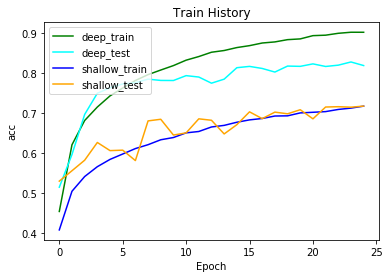

In [50]:
show_train_history('acc','val_acc')

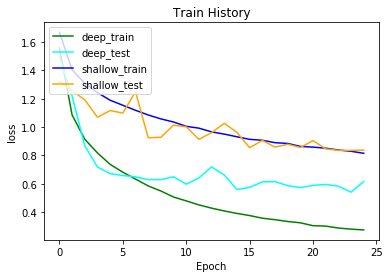

In [51]:
show_train_history('loss', 'val_loss')

> https://keras-cn.readthedocs.io/en/latest/models/model/#fit_generator
>
> https://blog.csdn.net/weixin_41432433/article/details/88667571

同時用cpu產生處理過的圖片，同時用gpu做訓練

In [15]:
# # 模擬資料後train
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     )
# datagen.fit(x_train)

# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=x_train.shape[0], epochs=3,validation_data=(x_test, y_test), workers=4, verbose=2)

In [16]:
# check gpu
# https://stackoverflow.com/questions/45662253/can-i-run-keras-model-on-gpu
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']